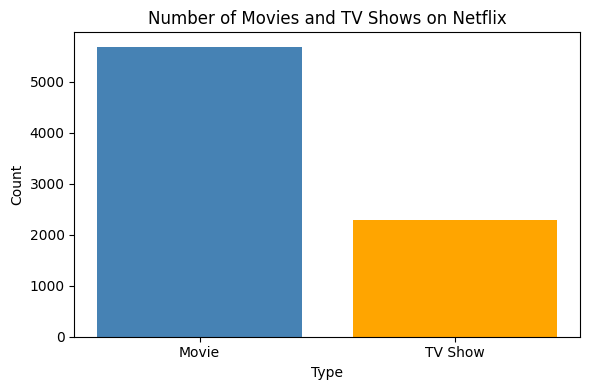

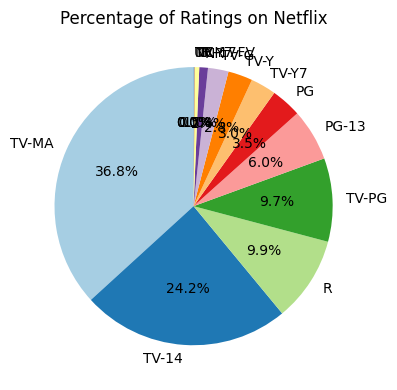

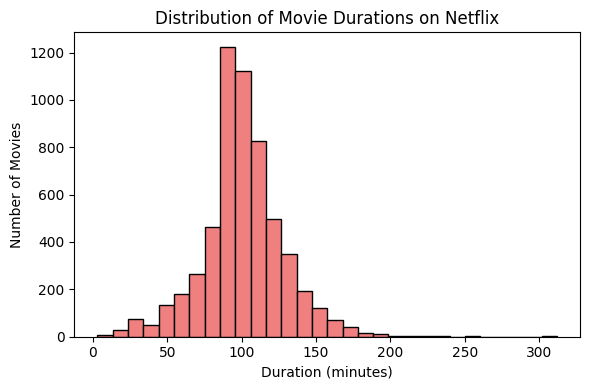

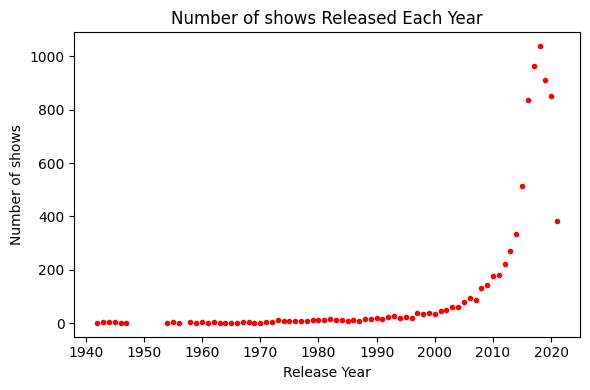

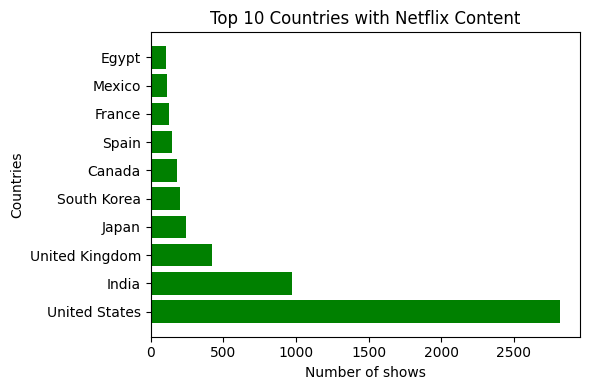

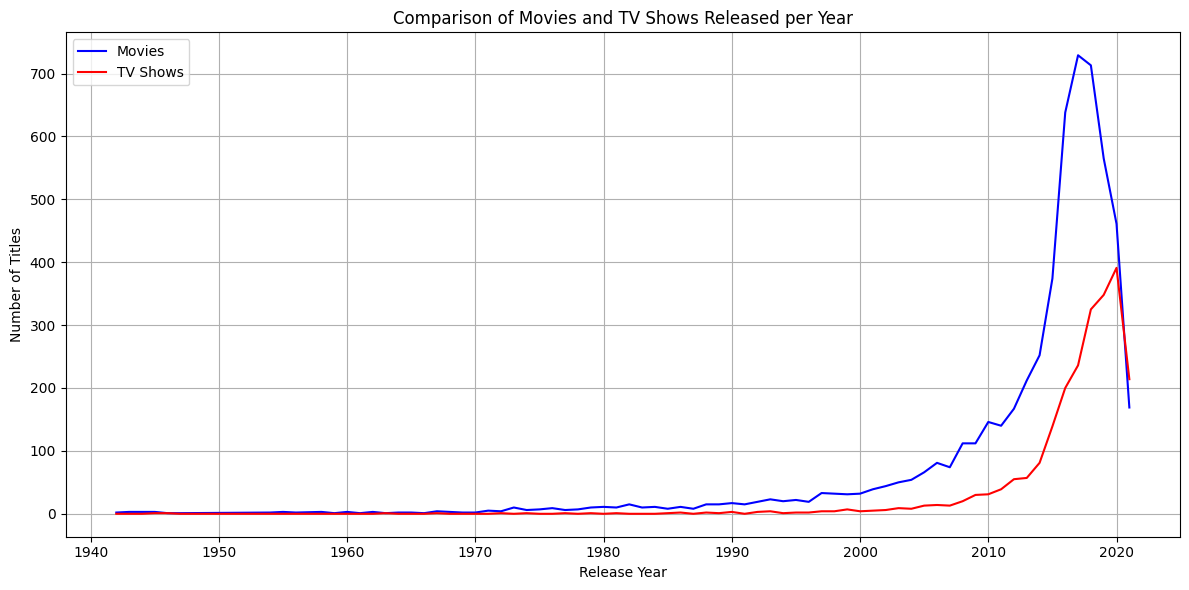

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')

# Cleaning the data
df = df.dropna(subset = ["type", "title", "release_year", "rating", "duration","country"])

# Plotting the number of movies vs TV shows in a bar chart
type_counts = df["type"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['steelblue', 'orange'])
plt.title('Number of Movies and TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("Movies_vs_TvShows.png")
plt.show()

# Plotting the distribution of content ratings in a pie chart
rating_counts = df["rating"].value_counts()
plt.figure(figsize = (6,4))
plt.pie(rating_counts, labels =rating_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage of Ratings on Netflix')
plt.tight_layout()
plt.savefig("Content_ratings.png")
plt.show()

# Filtering the DataFrame for movies and converting duration to integer
movie_df  = df[df["type"] =="Movie"].copy()
movie_df['duration_int'] = movie_df["duration"].str.replace("min","").astype(int)

# Plotting the distribution of movie durations in a histogram
plt.figure(figsize = (6,4))
plt.hist(movie_df['duration_int'], bins = 30, color = "lightcoral", edgecolor = "black")
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig("Movie_durations_histogram.png")
plt.show()

# Plotting the number of shows released each year in a scatter plot
release_counts = df["release_year"].value_counts().sort_index()
plt.figure(figsize = (6,4))
plt.scatter(release_counts.index, release_counts.values, color = "red",s = 9)
plt.title('Number of shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of shows')
plt.tight_layout()
plt.savefig("release_year_scatter.png")
plt.show()

# Plotting the top 10 countries with the most Netflix content in a horizontal bar chart
country_counts = df["country"].value_counts().head(10)
plt.figure(figsize = (6,4))
plt.barh(country_counts.index, country_counts.values, color = "green")
plt.title('Top 10 Countries with Netflix Content')
plt.xlabel('Number of shows')
plt.ylabel('Countries')
plt.tight_layout()
plt.savefig("Top10_countries.png")
plt.show()

#comparing the number of movies and TV shows released each year
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
plt.plot(content_by_year.index, content_by_year["Movie"], color='blue', label='Movies')
plt.plot(content_by_year.index, content_by_year["TV Show"], color='red', label='TV Shows')
plt.title('Comparison of Movies and TV Shows Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend()    
plt.tight_layout()
plt.grid(True)
plt.savefig("Netflix_content_trends.png")
plt.show()